# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [6]:
import pandas as pd
import statsmodels.api as sm

X = tips['net_bill']
y = tips['tip']  

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

results = model.summary()

print(results)


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           5.02e-23
Time:                        10:30:22   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3307      0.168      7.907      0.0

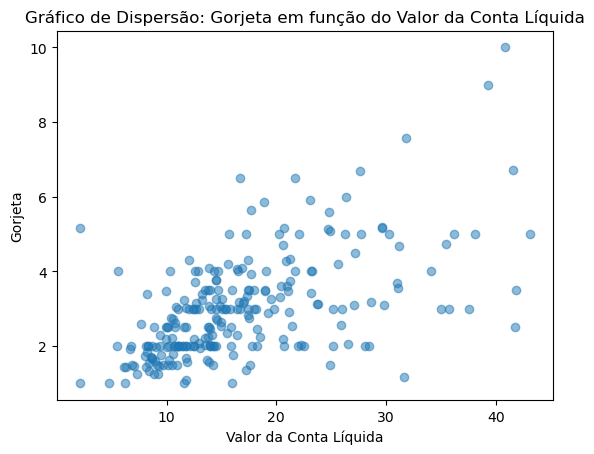

In [7]:
import matplotlib.pyplot as plt

X = tips['net_bill'] 
y = tips['tip'] 

plt.scatter(X, y, alpha=0.5)

plt.xlabel('Valor da Conta Líquida')
plt.ylabel('Gorjeta')
plt.title('Gráfico de Dispersão: Gorjeta em função do Valor da Conta Líquida')

plt.show()


### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [9]:
X1 = tips['tip_pct']
y1 = tips['net_bill']  

X1 = sm.add_constant(X1)

model1 = sm.OLS(y1, X1).fit()

results1 = model1.summary()

print(results1)

                            OLS Regression Results                            
Dep. Variable:               net_bill   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.52e-06
Time:                        10:37:35   Log-Likelihood:                -842.41
No. Observations:                 244   AIC:                             1689.
Df Residuals:                     242   BIC:                             1696.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.7901      0.782     25.296      0.0

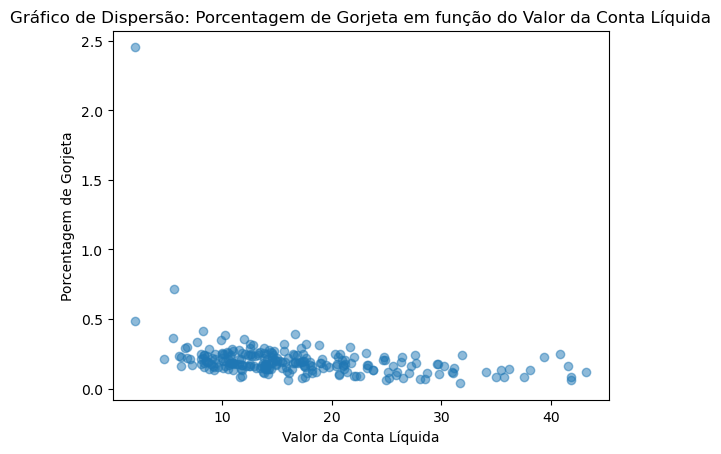

In [10]:
import matplotlib.pyplot as plt

X = tips['net_bill']  
y = tips['tip_pct']  

plt.scatter(X, y, alpha=0.5)

plt.xlabel('Valor da Conta Líquida')
plt.ylabel('Porcentagem de Gorjeta')
plt.title('Gráfico de Dispersão: Porcentagem de Gorjeta em função do Valor da Conta Líquida')

plt.show()


### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

No gráfico 2 os pontos aparecem mais concentrados em um linha reta entre 0 e 0.5. Já no gráfico 1 os pontos estão bem dispersos. Não podemos comparar os "R²", pois eles são relacionados a cada regressão específica.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [12]:
pred = model1.fittedvalues
pred

0      18.851209
1      16.949267
2      16.820903
3      17.376332
4      17.234106
         ...    
239    15.984901
240    18.610212
241    18.352781
242    18.172450
243    16.966055
Length: 244, dtype: float64

In [13]:
tips['tip_pred'] = tips['tip_pct'] * tips['net_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,const,tip_pred
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,1,1.01
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,1,1.66
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,1,3.50
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,1,3.31
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,1,3.61
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,1,5.92
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,1,2.00
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,1,2.00
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,1,1.75


In [14]:
r_squared = model.rsquared
r_squared

0.3325407312323706

O valor do R² do modelo 'tip' possui um valor quase igual ao do item 1. Com diferença de apenas 0,001.